In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/src/script.ipynb
/kaggle/lib/kaggle/gcp.py
/kaggle/input/face-m/face_m.h5
/kaggle/input/face-model1/face_model.h5
/kaggle/input/imaged/i2.jpg
/kaggle/input/imaged/i1.jpg
/kaggle/input/mimage/m8.jpg
/kaggle/input/mimage/m1.jpg
/kaggle/input/mimage/m5.jpg
/kaggle/input/mimage/m6.jpg
/kaggle/input/mimage/m3.jpg
/kaggle/input/mimage/m9.jpg
/kaggle/input/mimage/m2.jpg
/kaggle/input/mimage/m10.jpg
/kaggle/input/mimage/m7.jpg
/kaggle/input/mimage/m4.jpg
/kaggle/input/herotik/a22.jpg
/kaggle/input/herotik/a31.jpg
/kaggle/input/herotik/a25.jpg
/kaggle/input/herotik/a3.jpg
/kaggle/input/herotik/a37.jpg
/kaggle/input/herotik/a32.jpg
/kaggle/input/herotik/a6.jpg
/kaggle/input/herotik/a34.jpg
/kaggle/input/herotik/a36.jpg
/kaggle/input/herotik/a29.jpg
/kaggle/input/herotik/a7.jpg
/kaggle/input/herotik/a21.jpg
/kaggle/input/herotik/a10.jpg
/kaggle/input/herotik/a12.jpg
/kaggle/input/herotik/a20.jpg
/kaggle/input/herotik/a14.jpg
/kaggle/input/herotik/a8.jpg
/kaggle/input/herotik/a23.jpg
/kagg

In [2]:
pip install face_recognition

     |████████████████████████████████| 100.1 MB 14 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=a9b737d4b834d6b041cae3259aa01930c38ee4baef37aec89aa81e59649ef9ac
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np
import face_recognition
import keras
from keras.models import load_model
import cv2

Using TensorFlow backend.


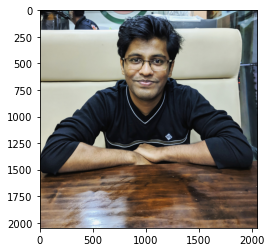

In [4]:
image1 = Image.open("/kaggle/input/herotik/a3.jpg")
image_array1 = np.array(image1)
plt.imshow(image_array1)

In [5]:
image = face_recognition.load_image_file("/kaggle/input/herotik/a3.jpg")

face_locations = face_recognition.face_locations(image)

In [6]:
face_locations

[(348, 1221, 811, 759)]

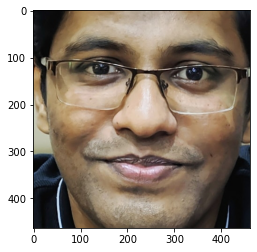

In [7]:

top, right, bottom, left = face_locations[0]
face_image1 = image[top:bottom, left:right]
plt.imshow(face_image1)
image_save = Image.fromarray(face_image1)
image_save.save("image_1.jpg")


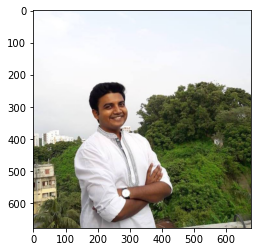

In [8]:
image2 = Image.open("/kaggle/input/mimage/m6.jpg")
image_array2 = np.array(image2)
plt.imshow(image_array2)

In [9]:
image2 = face_recognition.load_image_file("/kaggle/input/mimage/m6.jpg")

face_locations2 = face_recognition.face_locations(image2)

In [10]:
face_locations2

[(259, 306, 367, 199)]

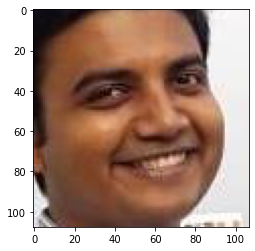

In [11]:
top, right, bottom, left = face_locations2[0]
face_image2 = image2[top:bottom, left:right]
plt.imshow(face_image2)
image_save2 = Image.fromarray(face_image2)
image_save2.save("image_2.jpg")


In [12]:
image1 = face_recognition.load_image_file("/kaggle/working/image_1.jpg")
image2 = face_recognition.load_image_file("/kaggle/working/image_2.jpg")
 
encoding_1 = face_recognition.face_encodings(image1)[0]

encoding_2 = face_recognition.face_encodings(image2)[0]

results = face_recognition.compare_faces([encoding_1], encoding_2,tolerance=0.50)

In [13]:
print (results)

[False]


In [14]:
emotion_dict= {'Angry': 0, 'Sad': 5, 'Neutral': 4, 'Disgust': 1, 'Surprise': 6, 'Fear': 2, 'Happy': 3}

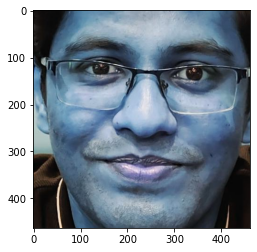

In [15]:
face_image  = cv2.imread("/kaggle/working/image_1.jpg")
plt.imshow(face_image)

In [16]:
print (face_image.shape)


(463, 462, 3)


In [17]:
# resizing the image
face_image = cv2.resize(face_image, (48,48))
face_image = cv2.cvtColor(face_image, cv2.COLOR_BGR2GRAY)
face_image = np.reshape(face_image, [1, face_image.shape[0], face_image.shape[1], 1])

In [18]:
model = load_model("/kaggle/input/face-m/face_m.h5")

In [19]:
print (face_image.shape)

(1, 48, 48, 1)


In [20]:
predicted_class = np.argmax(model.predict(face_image))

In [21]:
label_map = dict((v,k) for k,v in emotion_dict.items()) 
predicted_label = label_map[predicted_class]

In [22]:
print(predicted_label)

Happy


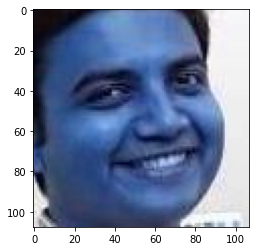

In [23]:
face_image  = cv2.imread("/kaggle/working/image_2.jpg")
plt.imshow(face_image)

In [24]:
print (face_image.shape)

(108, 107, 3)


In [25]:
# resizing the image
face_image = cv2.resize(face_image, (48,48))
face_image = cv2.cvtColor(face_image, cv2.COLOR_BGR2GRAY)
face_image = np.reshape(face_image, [1, face_image.shape[0], face_image.shape[1], 1])

In [26]:
print (face_image.shape)

(1, 48, 48, 1)


In [27]:
predicted_class = np.argmax(model.predict(face_image))

In [28]:
label_map = dict((v,k) for k,v in emotion_dict.items()) 
predicted_label = label_map[predicted_class]

In [29]:
print(predicted_label)

Happy
